In [1]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Fitters import Fit_Weibull_3P
from reliability.Probability_plotting import plot_points
from reliability.Fitters import Fit_Everything
from reliability.Reliability_testing import KStest
import matplotlib.pyplot as plt
from reliability.Other_functions import make_right_censored_data, histogram
from reliability.Reliability_testing import KStest
from reliability.Repairable_systems import optimal_replacement_time
import pandas as pd
import numpy as np
import json

C:\Users\Admin\anaconda3\envs\first_environment\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\anaconda3\envs\first_environment\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1: Generating synthetic data

In [60]:

# # Set a random seed for reproducibility
# np.random.seed(42)

# # Define the Weibull distribution parameters
# alpha = 250
# beta = 1.50

# # Generate random samples from the Weibull distribution
# data_weibull = Weibull_Distribution(alpha=alpha, beta=beta).random_samples(100)

# # Add Gaussian noise to the generated Weibull data
# mean = 0  # Mean of the Gaussian noise
# std_dev = 3  # Standard deviation of the Gaussian noise
# noise = np.random.normal(mean, std_dev, size=len(data_weibull))
# data_with_noise = data_weibull + noise
# data_with_noise=data_with_noise.astype(int)

In [70]:
# df = pd.DataFrame(data_with_noise, columns=['Failure Data'])

# # Specify the Excel file name
# excel_file = 'Equipment_Failure.xlsx'

# # Export the DataFrame to an Excel file
# df.to_excel(excel_file, index=False)

In [17]:
df1=pd.read_excel("Equipment_Failure.xlsx")
data_with_noise=df1.values
data_with_noise=data_with_noise.flatten()

In [18]:
print(data_with_noise)

[151 520 300 229  75  77  42 396 233 285  21 577 366  97  85  89 125 204
 169 118 241  71 123 147 175 331  90 198 232  34 244  82  42 516 556 349
 127  62 274 174  64 190  30 450 114 261 133 199 215  93 572 324 497 428
 230 466  48  92  29 138 153 115 367 141 120 216  66 345  46 666 320  87
   9 355 287 299 321  45 146  59 400 247 132  42 126 136 302 250 423 186
  65 295 316 217 321 191 204 170  22  61]


## Step 2:Fitting all available probability distributions to the data

C:\Users\Admin\anaconda3\envs\first_environment\lib\site-packages\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma    Lambda  Log-likelihood    AICc     BIC       AD optimizer
     Weibull_2P 232.696 1.45066                                                                                           -625.643 1255.41  1260.5 0.332079       TNC
       Gamma_2P 115.048 1.83132                                                                                           -625.898 1255.92 1261.01 0.362306       TNC
     Weibull_3P  222.21  1.3639 7.03485                                                                                   -625.038 1256.33 1263.89 0.296314       TNC
     Weibull_DS 232.696 1.45066                                                       1                                   -625.643 1257.54  1265.1 0.332079       TNC
       Gamma_3P 122.278 1.68433  4.7334                          

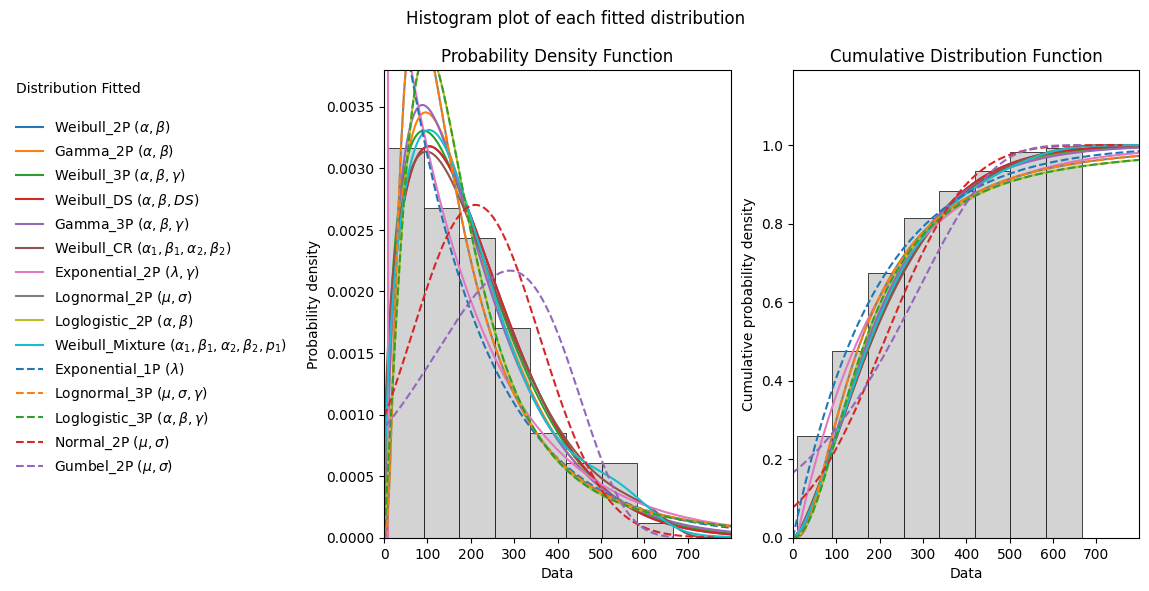

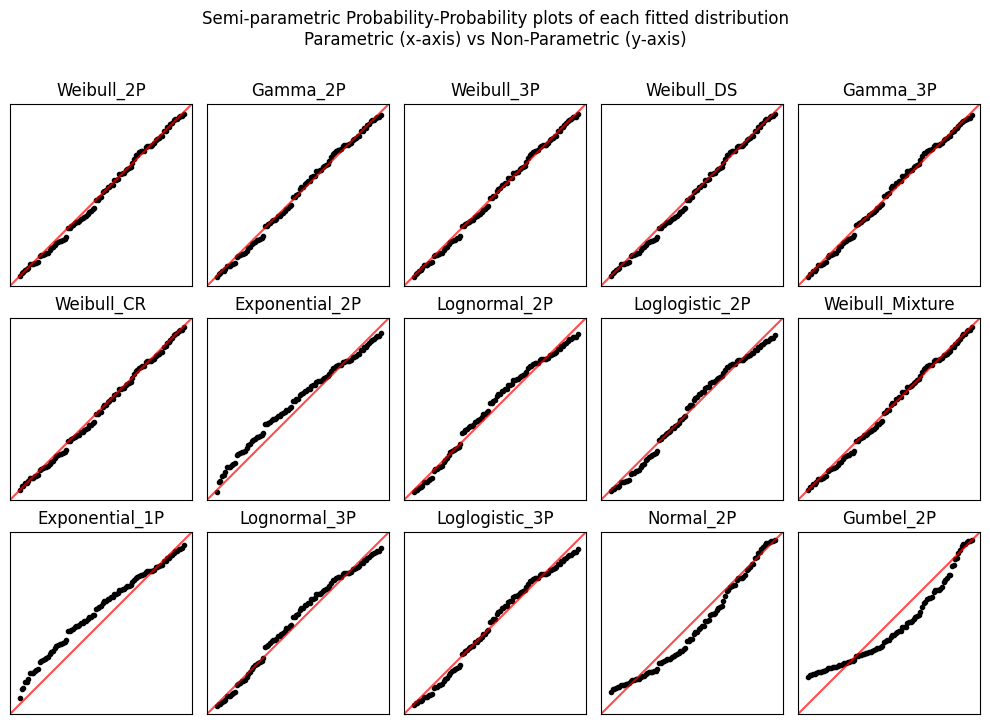

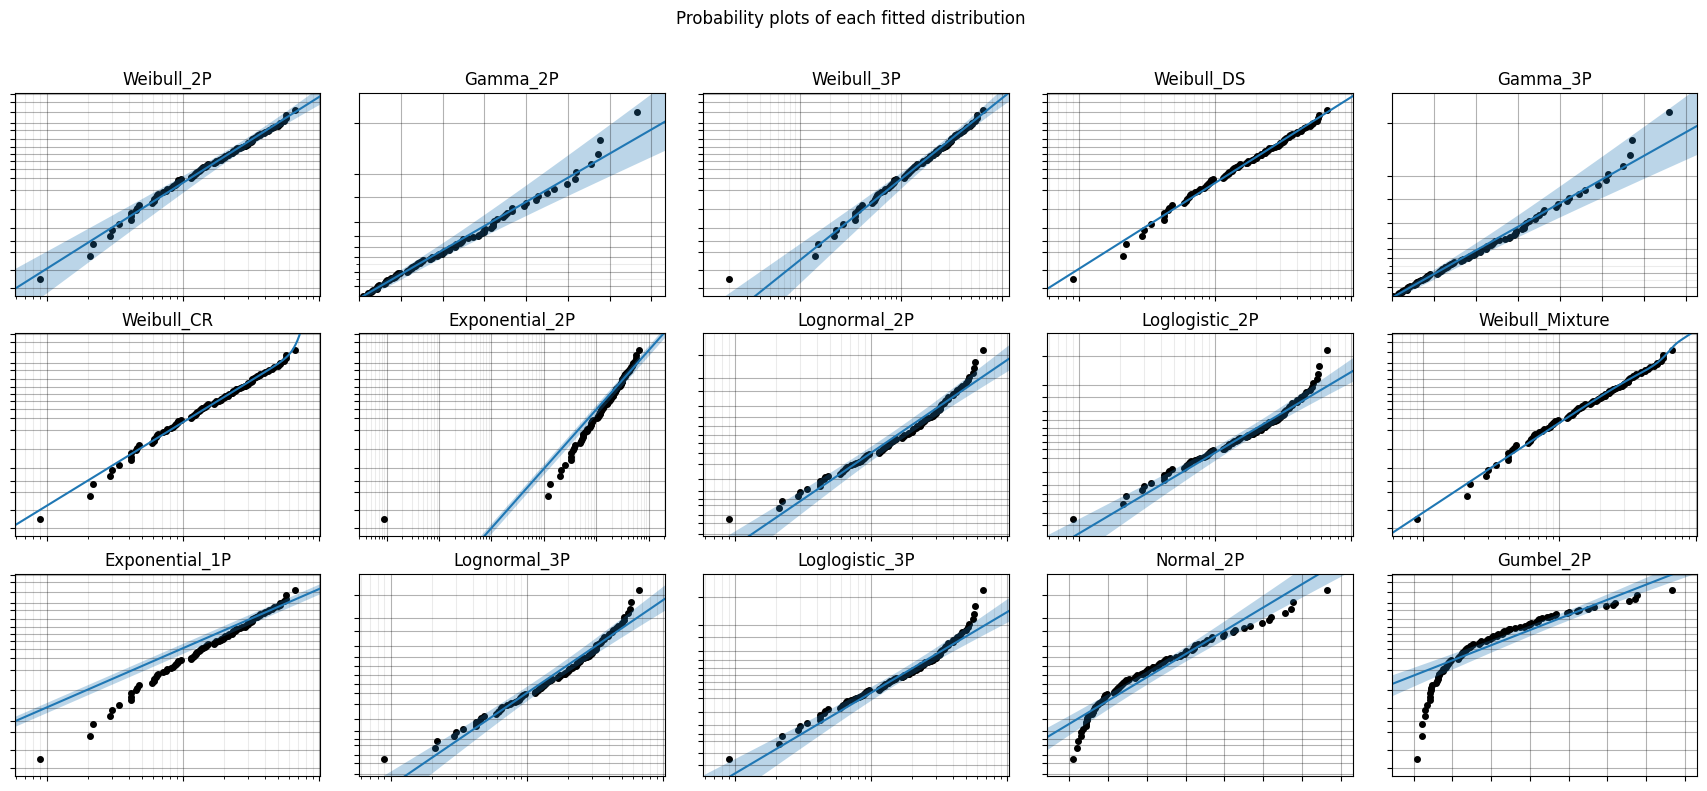

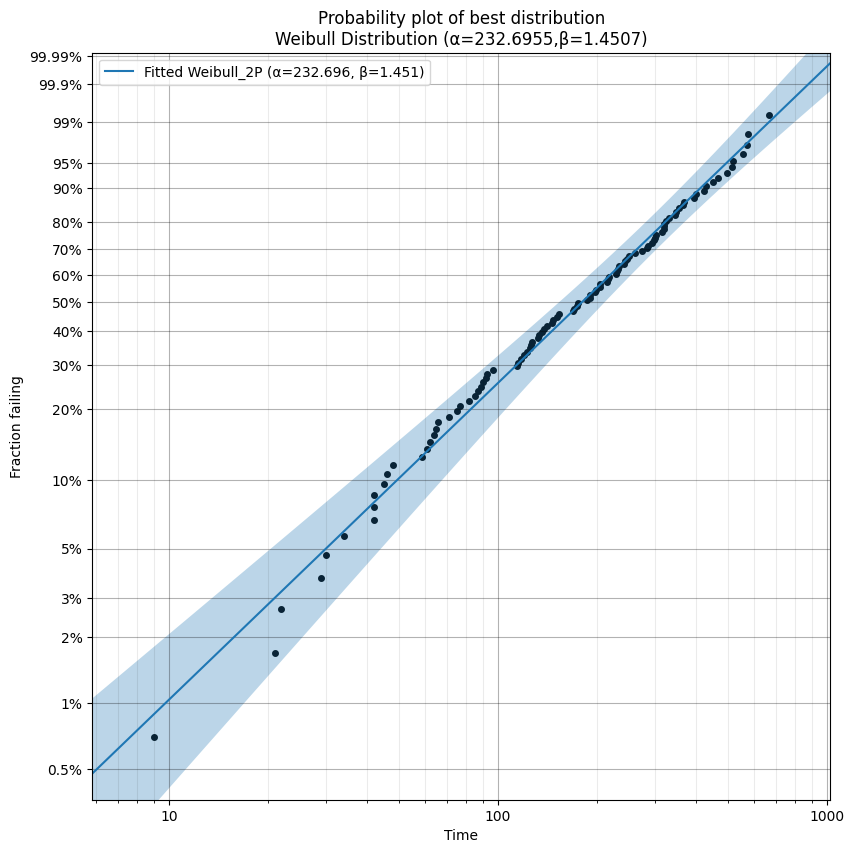

In [19]:
results=Fit_Everything(failures=data_with_noise)

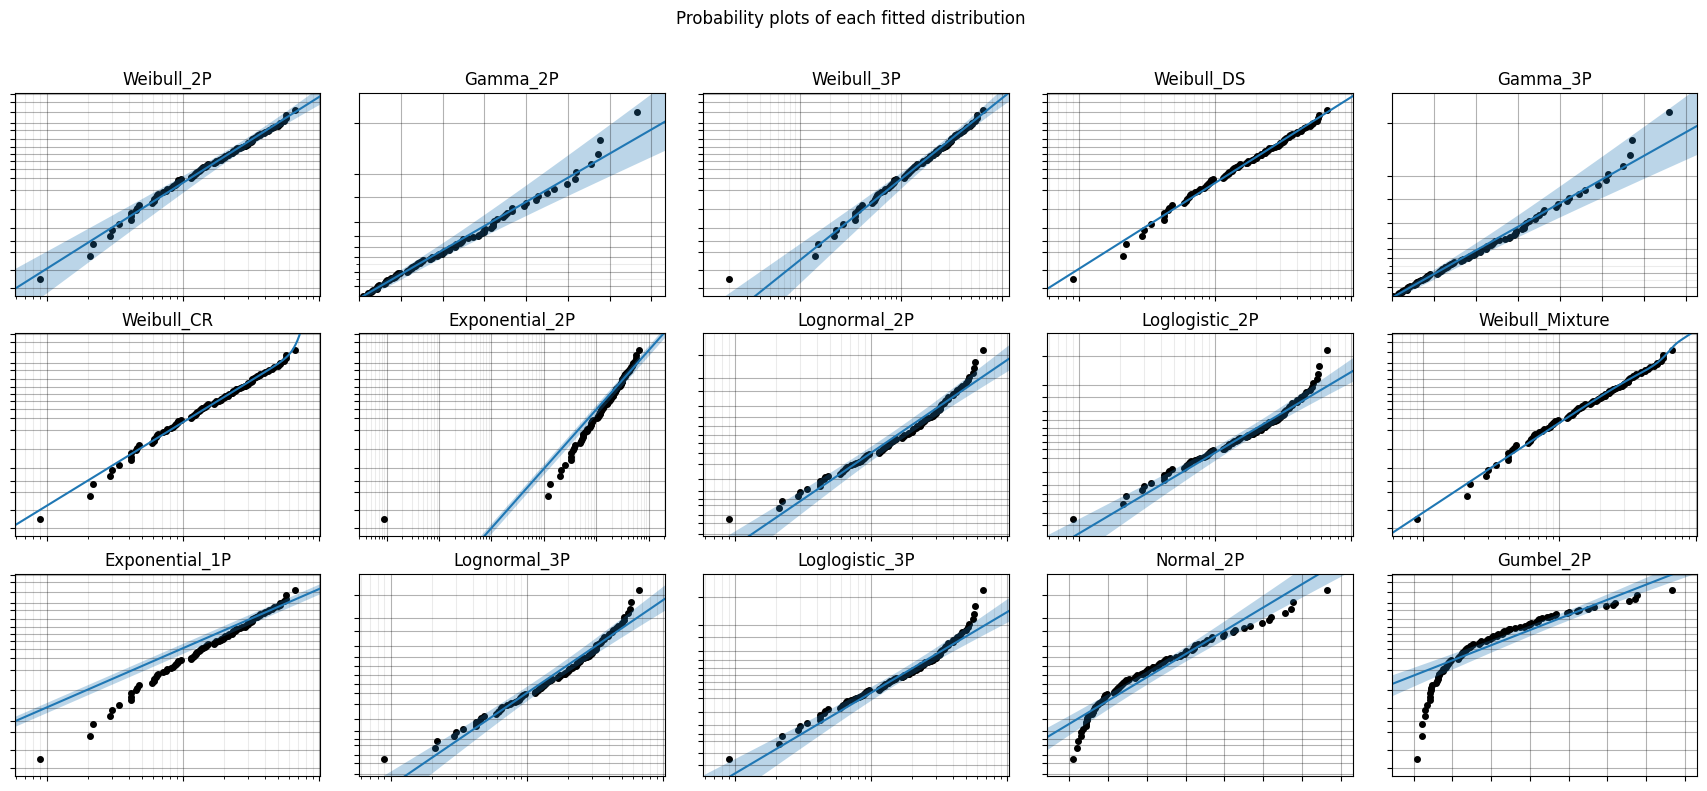

In [16]:
results.probability_plot

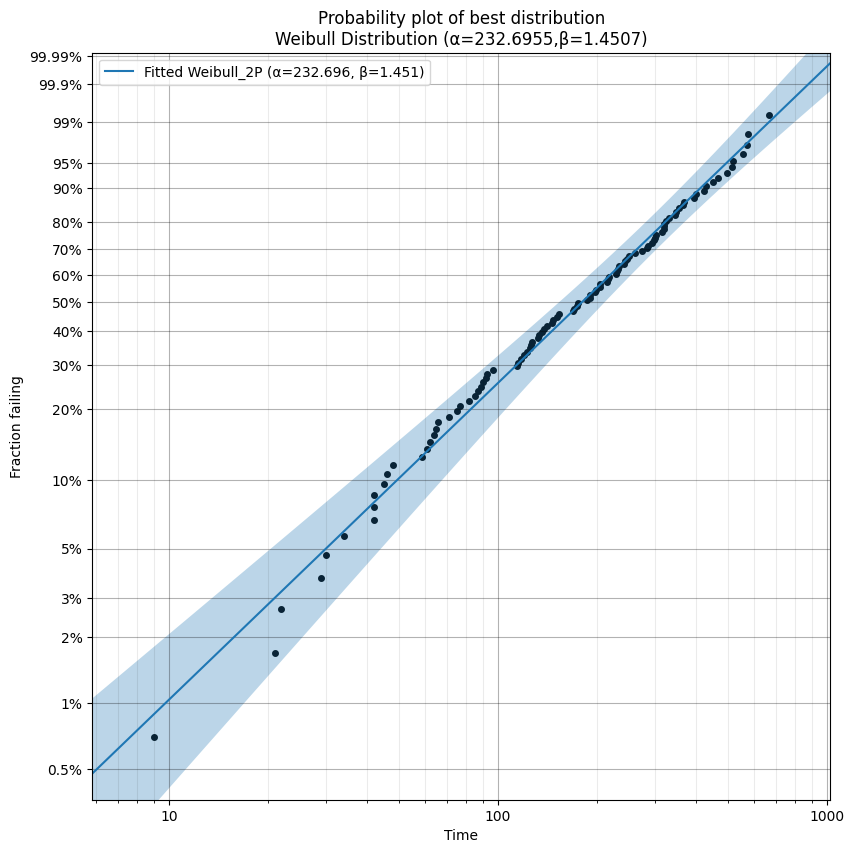

In [20]:
results.best_distribution_probability_plot

## Step 3: Fetching the best distribution and all the best paarmeters of that distribution, and its plot

Best Distribution: Weibull_2P
Best Parameters: [232.69550493   1.45066344   0.        ]


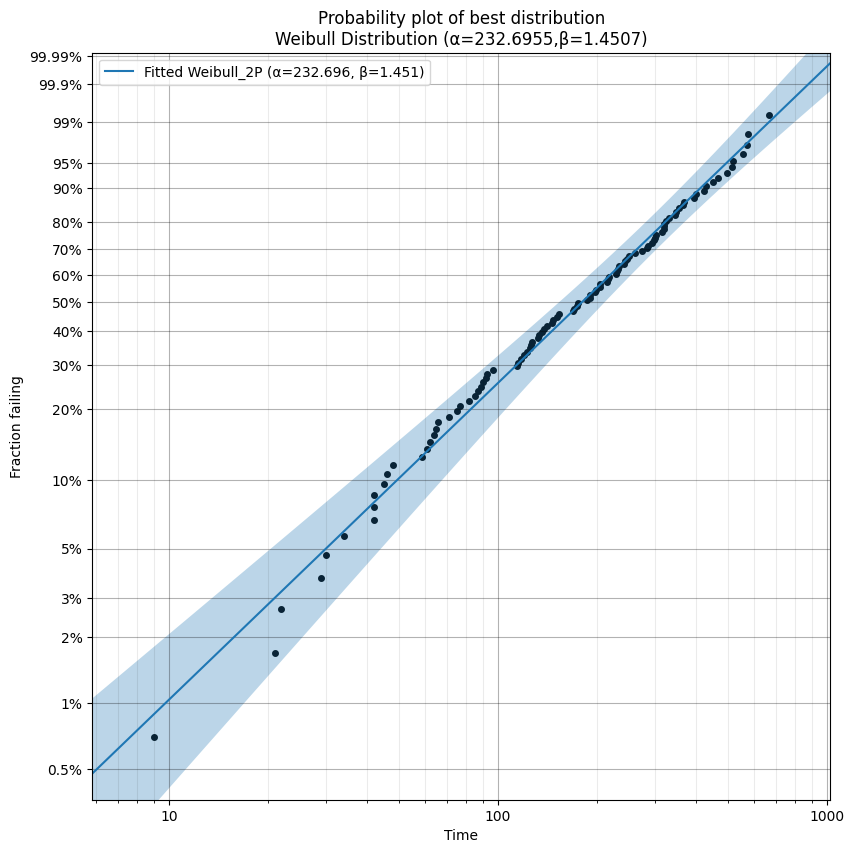

In [63]:
# Get the best distribution name
best_distribution_name = results.best_distribution_name
best_params =  results.best_distribution.parameters

# # Get the parameters of the best distribution
# best_distribution = results.distribution_instances[best_distribution_name]
# best_params = results.get_best_parameters(best_distribution_name)

# Print the best distribution and its parameters
print('Best Distribution:', best_distribution_name)
print('Best Parameters:', best_params)

results.best_distribution_probability_plot

# output2=results.probability_plot

## Step3: Conducting statistical-tests to check if the data is generated from same distribution

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 100/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         232.696         16.9118   201.802   268.319
     Beta         1.45066        0.114086   1.24344   1.69242 

Goodness of fit    Value
 Log-likelihood -625.643
           AICc  1255.41
            BIC   1260.5
             AD 0.332079 

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.04769819839964129
Kolmogorov-Smirnov critical value: 0.13402791648569978
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a weibull distribution (α=232.6955,β=1.4507)


C:\Users\Admin\anaconda3\envs\first_environment\lib\site-packages\reliability\Reliability_testing.py:1288: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(xmin, xmax)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


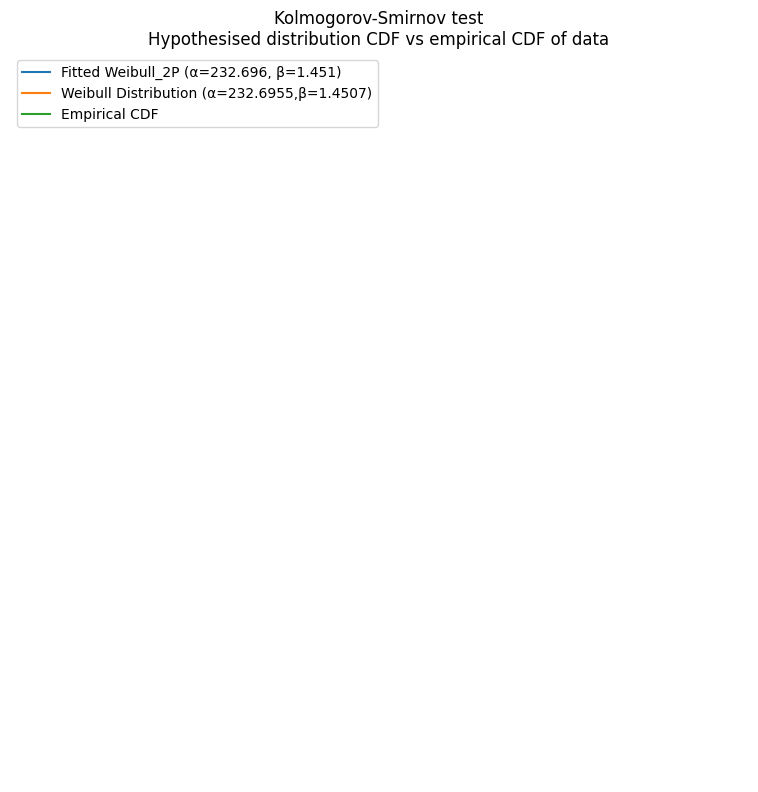

In [22]:
wb=Fit_Weibull_2P(failures=data_with_noise)
KStest(distribution=wb.distribution,data=data_with_noise)

## Step4: Finding the optimal number of days for preventive maintenance

Results from optimal_replacement_time:
Cost model assuming as good as new replacement (q=0):
The minimum cost per unit time is 342.25 
The optimal replacement time is 128.58


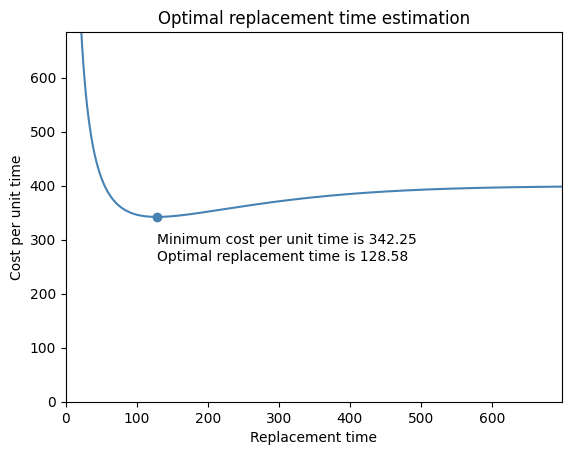

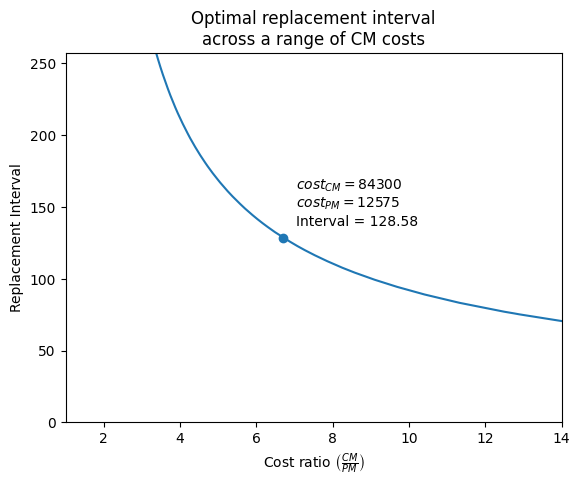

In [65]:
t=optimal_replacement_time(cost_PM=12575,cost_CM=84300,weibull_alpha=232.69,weibull_beta=1.45,q=0)

In [66]:
t.min_cost

342.24950630531896

In [67]:
t.ORT

128.5765676567657